In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Draw 100000 samples from normal distribution
mean =0 
std = 1
samples = np.random.normal(mean, std, size = 1000000)

fig, ax =plt.subplots(1,2, figsize=(18,4))
ax[0].hist(samples, bins = 100, density = True, rwidth =0.5)
ax[1].hist(samples, bins = 100, density = True, cumulative = True)
plt.show()

In [4]:
# Compute fraction that less then 2:

prob_less_2 = len(samples[samples<2])/1000000
prob_less_2

0.977133

In [5]:
from scipy.stats import norm

In [6]:
norm.cdf(1.96)

0.9750021048517795

In [7]:
norm.cdf(-1.96)

0.024997895148220435

# The Normal Distribution

## Introduction

For data scientists and machine learning professionals, the normal (also referred to as Gaussian) distribution stands out as one of the most commonly used distribution models. This lesson provides an introduction to the normal distribution, its characteristics, and its significance in data science. 

## Objectives
You will be able to:

* List the unique characteristics of a normal distribution
* Identify real world instances of things that follow a Gaussian distribution
* Use `numpy` to generate a random normal distribution

## The Normal Distribution

The normal distribution is the most important and most widely used distribution in statistics and data science. It is also called the "bell curve," due to its bell shape, or the "Gaussian curve" after the German mathematician Karl Friedrich Gauss.

Recall our NYC weather distribution. This is a classic example of a normal distribution. The idea is that there is sort of an expectation around what the temperature will be on June 1 (80 degrees Fahrenheit) and that temperatures much lower or much higher are less likely the further they move away from this expected temperature. This type of behavior is present in many phenomena, as you'll see later.

![](images/histogram_NYC_weather.png)

The normal distribution is **a continuous distribution**. In practice though, you'll see many discrete distributions that follow a bell curve shape:
- The observed values are actually discrete. For example, human IQ follows a normal distribution, but IQ is only specified up to the unit digit level, e.g. an IQ of 90, 91, or 92.
- The values in our distribution are actually continuous (e.g. our temperature example) but recorded up to a certain constant because there is (obviously) no "exact" thermometer that measures temperature up to an infinite amount of digits.

Even though the IQ level is not actually recorded as a continuous variable, you'll see that the distribution is generally represented as a smooth curve!


<img src="images/iq_bell.png" width = "650">



## The Probability Density Function

The probability density function equation for the normal distribution is given by the following expression:

$$ \large N(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $

Don't worry if your head is spinning right now. Don't worry about the formula, what you really need to remember is that:
- A normal distribution has 2 key parameters, $\mu$ and $\sigma$, which define the mean and the spread of the distribution, respectively.

- If you apply our formulas of expected values and variance seen in the PDF lesson before, where $X \sim N(x)$:
    - $ E(X) = \int_{- \infty}^{+ \infty} p(x)x dx = \mu $
    - $ E((X-\mu)^2) = \int_{- \infty}^{+ \infty} p(x)(x-\mu)^2 dx = \sigma^2$
    
  where $\mu$ and $\sigma$ are as specified in the formula of $N(x)$



## Mean and Standard Deviation

Here is a first simple definition for normal distributions:

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.**

A normal distribution is **centered around its mean**, so the distribution is not skewed (you'll have a chance to learn more about skewness later).  This doesn't mean that normal distributions cannot appear in different shapes and forms. How exactly the distribution behaves depends on the 2 key parameters, as specified before: the **mean** and the **standard deviation**.


The following figure shows four normal distributions:

<img src="images/normal_plt.png" width ="750">

* The green distribution has a mean of 0 and a standard deviation of 0.4 
* The distribution in blue has a mean of 0 and a standard deviation of 1.
* The distribution in red has a mean of 0 and a high spread with standard deviation of 3. 
* The orange distribution has a mean of 2 and a standard deviation of 0.5.

All of these distributions have the following properties in common:
- They are symmetric around the mean,
- They have relatively higher densities of values at the center of the distribution and relatively lower density in the tails

The CDFs of these distributions are shown below:

<img src="images/cumul_normal_plt.png" width="750">

## Some More Characteristics of the Normal Distribution

Let's summarize the key characteristics of the normal distribution below:

* Normal distributions are symmetric around their mean
* The mean, median, and mode of a normal distribution are equal
* The area under the bell curve is equal to 1.0
* Normal distributions are denser in the center and less dense in the tails
* Normal distributions are defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
* Around 68% of the area of a normal distribution is within _one standard deviation_ of the mean 
($(\mu-\sigma)$ to $(\mu + \sigma)$)
* Approximately 95% of the area of a normal distribution is within two standard deviations of the mean ($(\mu-2\sigma)$ to $(\mu + 2\sigma)$).


Let's look at the image below to get a better sense of the two last statements. In this image, the spread is differentiated between levels of deviation.

<img src="images/normal_sd_new.png" width ="750">

This forms a 68-95-99.7 rule, i.e., 68% values of a normal distribution are within 1 standard deviation of the mean, 95% within 2 standard deviations and 99.7 % within 3 standard deviations. This rule is also called the empirical rule. Normally distributed data is considered ideal for analysis due to this simplicity of description. Values in the extreme of tails (more than 3 standard deviations) can be considered "interesting events" as their probability of occurrence is very low (1 occurrence in about ~300!). In other cases, you'll consider them as outliers due to noise or error of measurement. It all depends on your analysis question. 

Keeping this in mind, have another look at the IQ distribution and identify "extreme events" in terms of IQ!

## Why So Popular?

In this section, you'll learn about some reasons why normal distributions are so popular among data scientists:

### Ubiquitous in Natural Phenomena

An amazingly vast number of natural processes naturally follow the normal distribution. A simple normal distribution gives the best model approximation for natural processes like weight, height, blood pressure, etc. Errors committed during some measurements are also found to be normally distributed so they can be modeled and isolated with ease. The income, expenditure and other social attributes of masses are often normally distributed as well.

### Central Limit Theorem

The Central Limit Theorem states: 
>When you add **a large number** of independent random variables, irrespective of the original distribution of these variables, **their sum tends towards a normal distribution**.

The theorem provides a reason why many natural phenomena follow a normal distribution.

The key takeaway from the central limit theorem is that it allows different distributions to be processed as a normal distribution, even when they do not fulfill the normality requirements shown above. We'll discuss this further when we talk about hypothesis testing.

[Here is an interesting youtube video highlighting this phenomenon](https://www.youtube.com/watch?v=AUSKTk9ENzg) for now. We will consider this in detail later. 

### Simplified Computation

When undergoing transformations, a number of distributions tend to change their nature and may result in a totally new distribution. With normal distributions, we can add random variables, take their product or apply any other advanced transformations (like Fourier transformations or Convolutions) - the resulting distribution will always be normal. 

For every normal model approximation, there may exist a complex multi-parameter distribution that gives a better approximation than the normal distribution. Even then, a normal distribution is often the preferred distribution to use because it makes the math a lot simpler!

## Normal Distributions in Python 

In Python, the NumPy module provides a ton of methods to generate and inspect random variables. 

You can generate a random normal distribution by providing its parameters $\mu$ and $\sigma$ (mean and sd) to `np.random.norm()`, along with $n$ (number of values to be generated for the normal distribution).

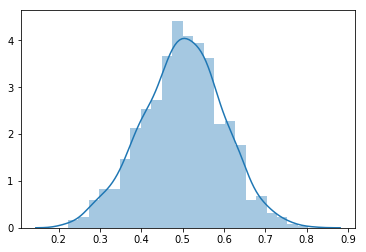

In [8]:
import numpy as np
import seaborn as sns

mu, sigma = 0.5, 0.1
n = 1000
s = np.random.normal(mu, sigma, n)
sns.distplot(s);
plt.show()

## A quick refresher! 

Here's the formula for the normal distribution density function once more:

$$ \large N(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $


In [36]:
# Generate a random normal variable with given parameters , n=5000
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use('ggplot')

mean =14 
std = 2.8
bins = 20
samples = np.random.normal(mean, size = 5000)


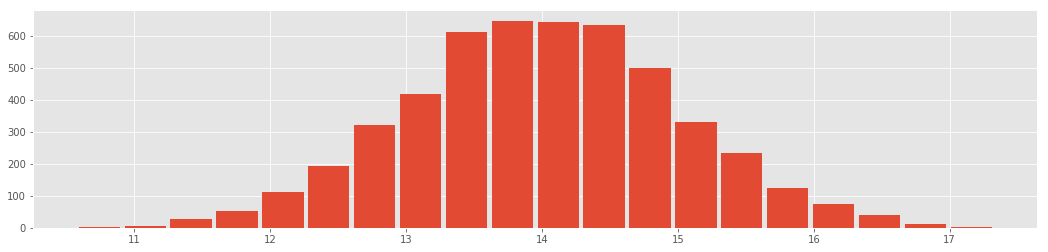

In [38]:
# Calculate a histogram for above data distribution
fig, ax =plt.subplots(figsize=(18,4))
ax.hist(samples, bins = bins, rwidth =0.9)
plt.show()

In [58]:
import math
# Calculate the normal Density function 
# Calculate the normal Density function 
density = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

In [59]:
density 

0.014343243014608252

In [60]:
# Plot histogram along with the density function
import matplotlib.pyplot as plt
import numpy as np

plt.hist(samples, bins = bins, density = True, rwidth =0.9)
plt.plot(bins, density)
plt.show()

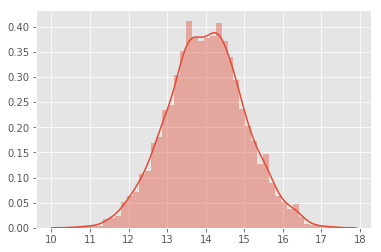

In [61]:
import seaborn as sns
sns.distplot(samples)

In [ ]:
# Use seaborn to plot the histogram with KDE
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [15]:
fig, ax  = plt.subplots( figsize = (10,8))

sns.distplot(samples, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 }
             )
ax.set_title('Density Estimations')
plt.legend();

# The Standard Normal Distribution

## Introduction
In this lesson, we will introduce a special case of normal distributions: "The Standard Normal Distribution".

## Objectives

You will be able to:

* Compare and contrast the normal and standard normal distribution
* Calculate and interpret the z-score (standard score) for an observation from normally distributed data
* Convert between a normal and a standard normal distribution

## What is a Standard Normal Distribution?

Previously, you learned about the normal (or Gaussian) distribution, which is characterized by a bell shape curve. We also identified the mean and standard deviation as the defining parameters of this distribution. As mentioned before, normal distributions do not necessarily have the same means and standard deviations. 

The standard normal distribution, however, is a **special case** of the normal distribution. The Standard Normal Distribution is a normal distribution with a mean of 0 and a standard deviation of 1. 

<img src = "images/snorm.png" width = "650">

Plotting a continuous cumulative distribution function for the standard normal distribution, the CDF would look like this:
<img src = "images/cdf_stnormal.png" width ="450">

Thinking back to the standard deviation rule for normal distributions:

* $68\%$ of the area lies in the interval of 1 standard deviation from the mean, or mathematically speaking, $68\%$ is in the interval  $[\mu-\sigma, \mu+\sigma]$
*  $95\%$ of the area lies in the interval of 2 standard deviations from the mean, or mathematically speaking, $95\%$ is in the interval  $[(\mu-2\sigma), (\mu+2\sigma)]$
* $99\%$ of the area lies in the interval of 3 standard deviations from the mean, or mathematically speaking, $99\%$ is in the interval  $[(\mu-3\sigma), (\mu+3\sigma)]$


With a $\mu = 0$ and $\sigma=1$, this means that for the standard normal distribution:

* $68\%$ of the area lies between -1 and 1.
* $95\%$ of the area lies between -2 and 2.
* $99\%$ of the area lies between -3 and 3.

This simplicity makes a standard normal distribution very desirable to work with. The exciting news is that you can very easily **transform** any normal distribution to a standard normal distribution!

## Standard Score (z-score)

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\dfrac{x-\mu}{\sigma}$$

Here, $x$ is an observation from the original normal distribution, $\mu$ is the mean and $\sigma$ is the standard deviation of the original normal distribution. 


The standard normal distribution is sometimes called the $z$-distribution. A $z$-score always reflects the number of standard deviations above or below the mean. 

### An example 

Imagine some test results follow a normal distribution with a mean score of 50 and a standard deviation of 10.
One of the students scored a 70 on the test. Using this information and $z$-scores makes it easy to tell how she performed in terms of standard deviations from the mean. Converting a test score of 70 to a $z$-score, an $x$ of 70 would be, in this case: 

$z = \dfrac{70 - 50}{10}  = 2$

By transforming the test result of 70 to a $z$-score of 2, we now know that the student's original score was 2 standard deviations above the mean score. Note that the $z$ distribution will only be a normal distribution if the original distribution of $x$ was normal.

In summary, calculating the $z$-score gives us quick and easy access to understanding how **extreme** a certain result is. Looking at the original distribution ($\mu =50$, $\sigma=10$) and the standard normal distribution ($\mu =0$, $\sigma=1$) while highlighting $x=70$ and $z=2$ gives the following result: 


<img src = "images/test_std_normal.png" width ="950">

Visually, the idea is that the area under the curve, left and right from the vertical red line, are identical in the left plot and the right plot!

Thinking along these lines, you can also convert a $z$-score back to an original score $x$ by using the same formula as:

$$\large x=\mu + z\sigma$$

For the above example, this would work out as:

$x = 50 + 2*10 = 70 $

## Data Standardization

Data standardization is a common data preprocessing skill, which is used to compare a number of observations belonging to different normal distributions which may have distinct means and standard deviations. 

Standardization applies a $z$-score calculation, as shown above, on each element of the distribution. The output of this process is a **z-distribution** or a **standard normal distribution**. 
<img src="images/flow.png" width=600>

Let's look at a quick example. First, we'll randomly generate two normal distributions with different means and standard deviations. Let's generate 1000 observations for each. Next, we'll use `seaborn` to plot the results.

In [19]:
mean1, sd1 = 5, 3 # dist 1 
mean2, sd2 = 10, 2 #Â dist 2 
d1 = np.random.normal(mean1, sd1, 1000)
d2 = np.random.normal(mean2, sd2, 1000)
sns.distplot(d1);
sns.distplot(d2);

You can see that these distributions differ from each other and are not directly comparable.

For a number of machine learning algorithms and data visualization techniques, it is important that the effect of the scale of the data is removed before you start thinking about building your model. Standardization allows for this by converting the distributions into a $z$-distribution, bringing them to a common scale (with $\mu = 0$, $\sigma = 1$). Let's standardize the above distributions and look at the effect. 

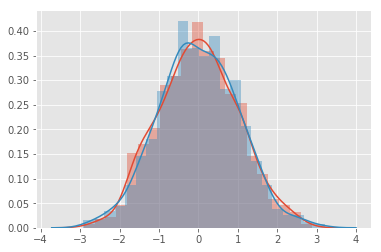

In [20]:
# Stardardizing and visualizing distributions

sns.distplot([(x - d1.mean())/d1.std() for x in d1]);
sns.distplot([(x - d2.mean())/d2.std() for x in d2]);

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('yield.csv')

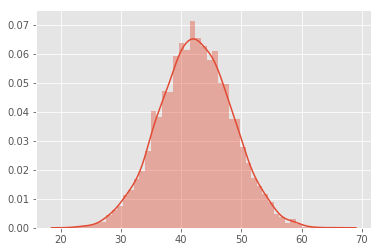

In [25]:
sns.distplot(df)
plt.show()

In [26]:
# Import libraries
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
# Read the yield data as a dataframe
df = pd.read_csv('yield.csv')
df.head()

0
0  39.741234
1  39.872055
2  44.331164
3  46.600623
4  40.694984

In [29]:
# Your answer here
mean = df.mean()[0]
std = df.std()[0]
print('mean : {}'.format(mean))
print('std : {}'.format(std))

mean : 42.40762385776258
std : 6.003696504846293


In [30]:
# Perform any calculations necessary here
limits = (mean-3*std , mean+3*std)

In [31]:
# Write your answer here 
print ('Interval bounds which contain 99% of the observations: {}'.format(limits))

Interval bounds which contain 99% of the observations: (24.3965343432237, 60.41871337230146)


Mean: 0.0
SD: 1.0


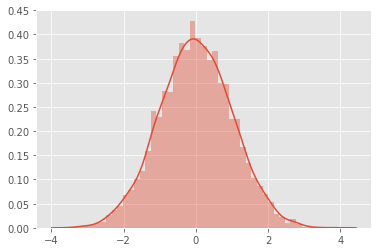

In [62]:
# Give your solution here 
z_data = [(x-df['0'].mean())/df['0'].std() for x in df['0']]
sns.distplot(z_data)

mean = np.mean(np.array(z_data))
sd = np.std((np.array(z_data)))
print ('Mean:', round(mean,2))
print ('SD:', round(sd,2))

In [63]:
# It is a standard normal distribution
# Mean is 0 (it is a very small figure that rounds off to 0)
# SD is 1
# This is obvious because we standardised the whole distribution